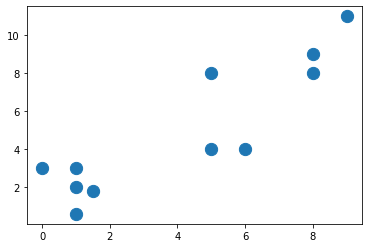

[[ 1.   2. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]
 [ 1.   3. ]
 [ 8.   9. ]
 [ 0.   3. ]
 [ 5.   4. ]
 [ 6.   4. ]]  data

0 {0: array([1., 2.]), 1: array([1.5, 1.8])}  centroids

484.7222222222223 

1 {0: array([0.66666667, 2.66666667]), 1: array([5.4375, 5.8   ])}  centroids

13.0 

52.10727969348656 

2 {0: array([0.9 , 2.08]), 1: array([6.83333333, 7.33333333])}  centroids

{0: array([0.9 , 2.08]), 1: array([6.83333333, 7.33333333])} final centroids


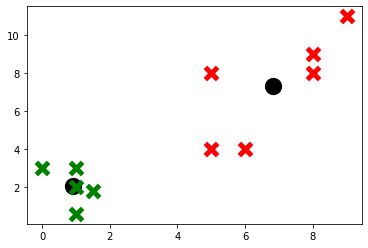

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')
import numpy as np


class K_Means:
    
    def __init__(self, k=2, tol=0.01, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.centroids = {}
        

    def fit(self, data):
        
        # Intialize points for centres (means) of k clusters (at random)
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            print(i, self.centroids, ' centroids\n')
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            # Assign each instance x_i to the closest of the k points
            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            # Compute the means (mu_i) of each of the k clusters
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            # re-assign the k points to be the means (mu_i) of each of the k clusters
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    print(np.sum((current_centroid - original_centroid) / original_centroid * 100.0), "\n")
                    optimized = False

            if optimized:
                break
                
        return self.centroids
    

    def predict(self, data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

# main

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9,11],
              [1,3],
              [8,9],
              [0,3],
              [5,4],
              [6,4],])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()
plt.clf()

print(X, ' data\n')

colors = 10*["g","r","c","b","k"]

clf = K_Means()
x = clf.fit(X)
print(x, 'final centroids')

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

In [4]:
X[1]

array([1.5, 1.8])

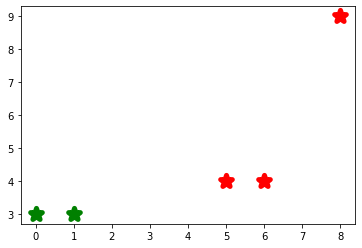

<Figure size 432x288 with 0 Axes>

In [3]:
# in case we wish to test if data belongs to a cluster
unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)

plt.show()
plt.clf()